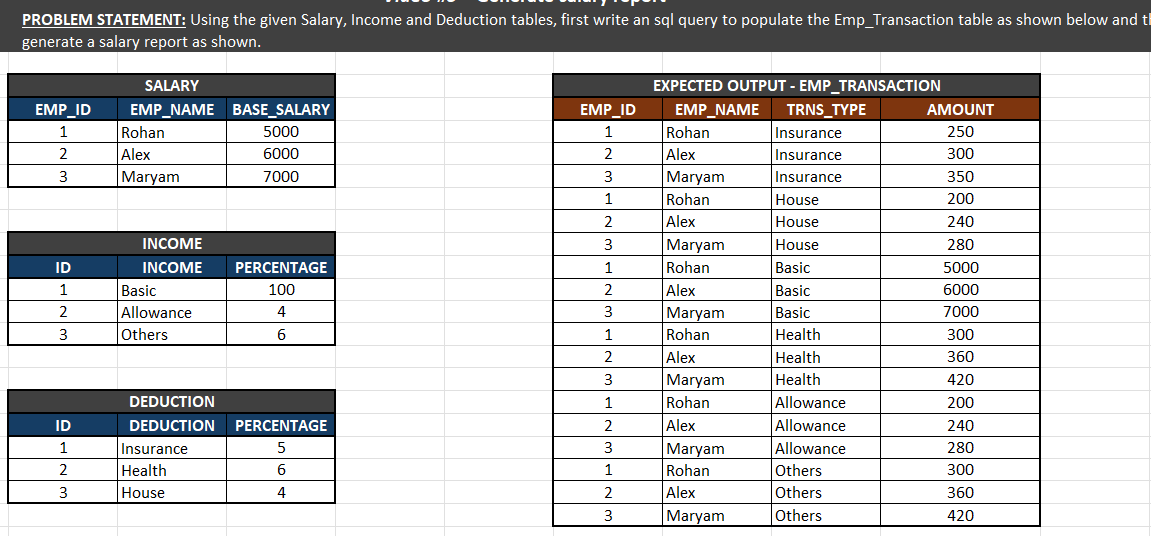

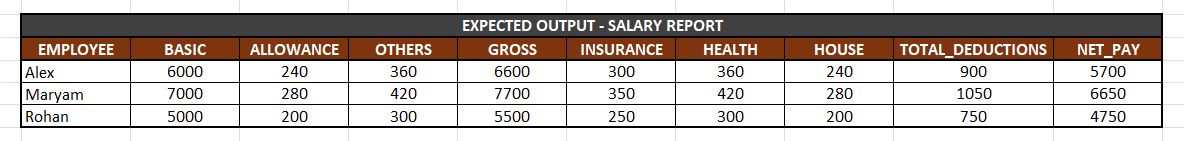

In [1]:
import pandas as pd

# Data for SALARY
salary_data = {
    "EMP_ID": [1, 2, 3],
    "EMP_NAME": ["Rohan", "Alex", "Maryam"],
    "BASE_SALARY": [5000, 6000, 7000]
}
salary_df = pd.DataFrame(salary_data)

# Data for INCOME
income_data = {
    "ID": [1, 2, 3],
    "INCOME": ["Basic", "Allowance", "Others"],
    "PERCENTAGE": [100, 4, 6]
}
income_df = pd.DataFrame(income_data)

# Data for DEDUCTION
deduction_data = {
    "ID": [1, 2, 3],
    "DEDUCTION": ["Insurance", "Health", "House"],
    "PERCENTAGE": [5, 6, 4]
}
deduction_df = pd.DataFrame(deduction_data)

# Display the data frames
print("Salary DataFrame:")
print(salary_df)

print("\nIncome DataFrame:")
print(income_df)

print("\nDeduction DataFrame:")
print(deduction_df)


Salary DataFrame:
   EMP_ID EMP_NAME  BASE_SALARY
0       1    Rohan         5000
1       2     Alex         6000
2       3   Maryam         7000

Income DataFrame:
   ID     INCOME  PERCENTAGE
0   1      Basic         100
1   2  Allowance           4
2   3     Others           6

Deduction DataFrame:
   ID  DEDUCTION  PERCENTAGE
0   1  Insurance           5
1   2     Health           6
2   3      House           4


In [3]:
income_df.rename(columns={"INCOME":"TRNS_TYPE"},inplace=True)
deduction_df.rename(columns={"DEDUCTION":"TRNS_TYPE"},inplace=True)
d = pd.concat([income_df,deduction_df])
d

,ID,TRNS_TYPE,PERCENTAGE
0,1,Basic,100
1,2,Allowance,4
2,3,Others,6
0,1,Insurance,5
1,2,Health,6
2,3,House,4


In [11]:
report=pd.merge(salary_df,d, how='cross')
report["AMOUNT"]=report.apply(lambda x: x["BASE_SALARY"]*x["PERCENTAGE"]/100,axis=1)
report.drop(columns=["BASE_SALARY","PERCENTAGE","ID"],inplace=True)
report

,EMP_ID,EMP_NAME,TRNS_TYPE,AMOUNT
0,1,Rohan,Basic,5000.0
1,1,Rohan,Allowance,200.0
2,1,Rohan,Others,300.0
3,1,Rohan,Insurance,250.0
4,1,Rohan,Health,300.0
5,1,Rohan,House,200.0
6,2,Alex,Basic,6000.0
7,2,Alex,Allowance,240.0
8,2,Alex,Others,360.0
9,2,Alex,Insurance,300.0


In [14]:
salary_report = pd.pivot_table(report,index="EMP_NAME", columns="TRNS_TYPE", values="AMOUNT" )
final=salary_report.reset_index()

In [27]:
final["GROSS"]=final.apply(lambda x: x["Basic"]+x["Allowance"]+x["Others"],axis=1)
final["TOTAL_DEDUCTIONS"]=final.apply(lambda x: x["Insurance"]+x["Health"]+x["House"],axis=1)
final["NET_PAY"] = final["GROSS"] - final["TOTAL_DEDUCTIONS"]
#final.drop(columns=["TRNS_TYPE"],inplace=True)
final.columns.name=None
final.columns = final.columns.str.upper()

In [32]:
final=final[["EMP_NAME", "BASIC", "ALLOWANCE", "OTHERS", "GROSS", "INSURANCE", "HEALTH","HOUSE","TOTAL_DEDUCTIONS","NET_PAY"]]
final.rename(columns={"EMP_NAME":"EMPLOYEE"},inplace=True)
final

,EMPLOYEE,BASIC,ALLOWANCE,OTHERS,GROSS,INSURANCE,HEALTH,HOUSE,TOTAL_DEDUCTIONS,NET_PAY
0,Alex,6000.0,240.0,360.0,6600.0,300.0,360.0,240.0,900.0,5700.0
1,Maryam,7000.0,280.0,420.0,7700.0,350.0,420.0,280.0,1050.0,6650.0
2,Rohan,5000.0,200.0,300.0,5500.0,250.0,300.0,200.0,750.0,4750.0
